# Classifying Pumpkin Seeds

build models to classify types of pumpkin seeds using features engineered from photographs of the seeds.

In [2]:
# import libraries we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## 1. Load the data

In [3]:
seeds = pd.read_excel("../../Data/Pumpkin_Seeds_Dataset.xlsx")

In [4]:
seeds.sample(5)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
1713,77070,1152.830,486.4784,202.5228,77800,313.2548,0.9092,0.9906,0.5715,0.7287,2.4021,0.6439,Ürgüp Sivrisi
1266,81737,1144.461,469.1301,222.8947,82574,322.6000,0.8799,0.9899,0.7354,0.7842,2.1047,0.6877,Çerçevelik
1074,79103,1137.093,470.8921,214.5860,79992,317.3595,0.8901,0.9889,0.5939,0.7688,2.1944,0.6740,Çerçevelik
586,58555,928.778,357.5607,210.1878,59384,273.0468,0.8090,0.9860,0.6839,0.8530,1.7011,0.7636,Çerçevelik
1836,98208,1279.555,539.5062,232.4119,98983,353.6132,0.9025,0.9922,0.6873,0.7538,2.3213,0.6554,Ürgüp Sivrisi


Create a new column of the DataFrame called y where y=1 if Class=Ürgüp Sivrisi and y=0 if Class=Çerçevelik.

In [5]:
seeds['y'] = 0

seeds.loc[seeds.Class=='Ürgüp Sivrisi', 'y']=1

## 2. Learn about the data

In [6]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
 13  y                  2500 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 273.6+ KB


data is clean, no missing values, no type problems.

In [7]:
seeds.head(5)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,y
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,0


## 3. Train test split

### a. imbalanced data?

In [8]:
seeds.Class.value_counts(normalize=True)

Çerçevelik       0.52
Ürgüp Sivrisi    0.48
Name: Class, dtype: float64

This data set seems pretty well balanced.

### b. train test split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
seeds_train, seeds_test = train_test_split(seeds.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.1,
                                              stratify=seeds.y)

## 4. Exploratory data analysis (EDA)

Before building any models we will do some EDA.

### a. plot histograms of the feature values for each of the classes

One way to try and identify key features for classification algorithms is to plot histograms of the feature values for each of the classes.

Below is an example of such a histogram for the `Area` column made using `plt.hist`.

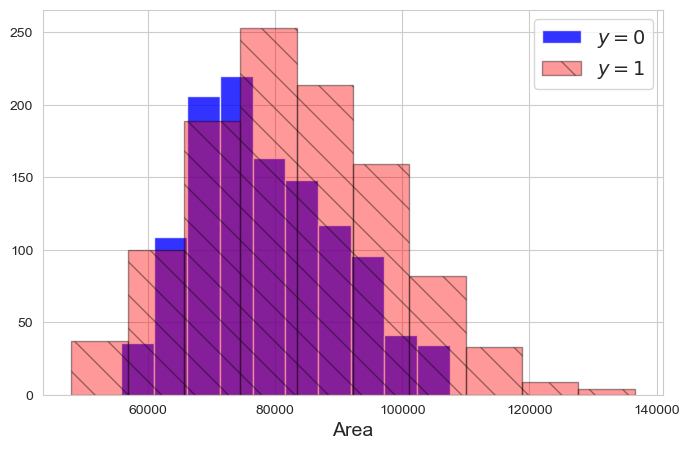

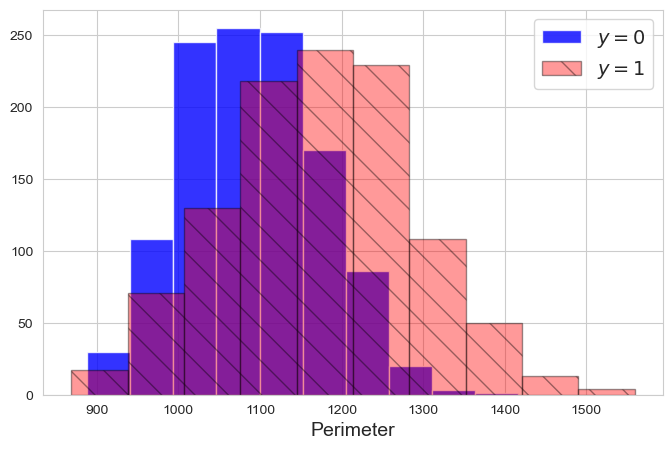

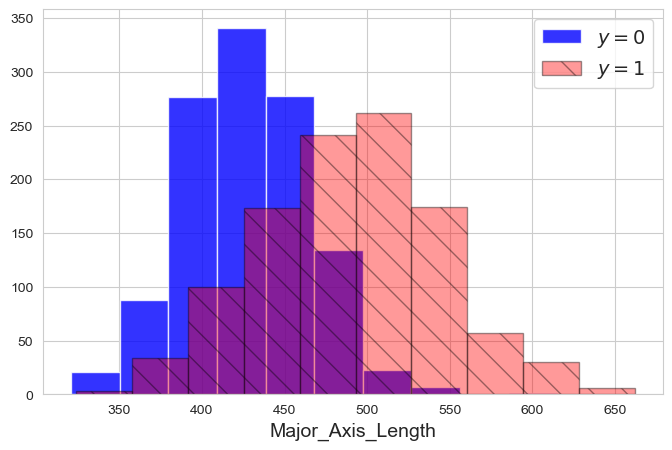

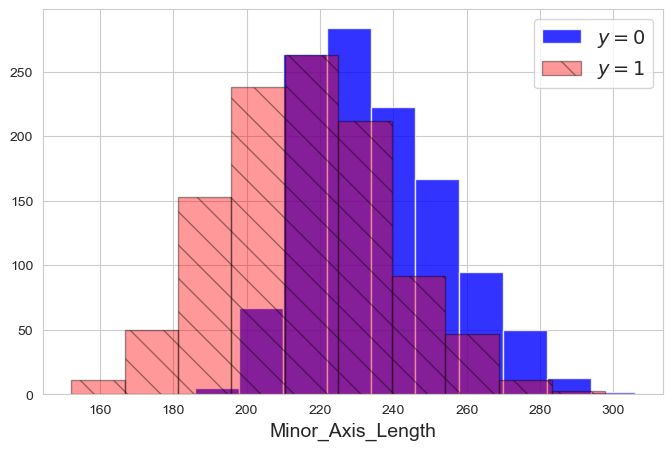

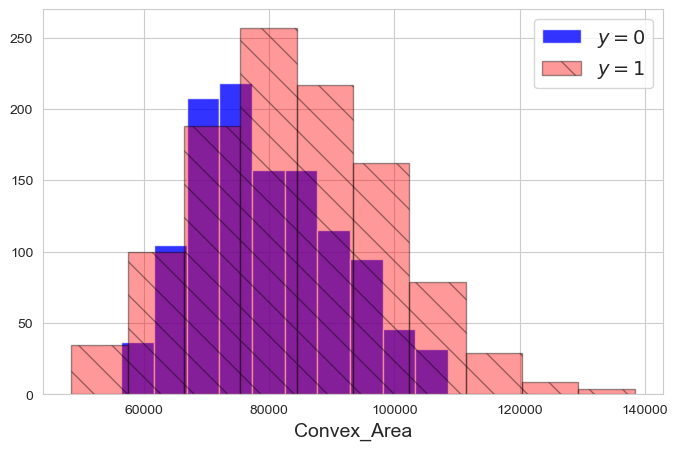

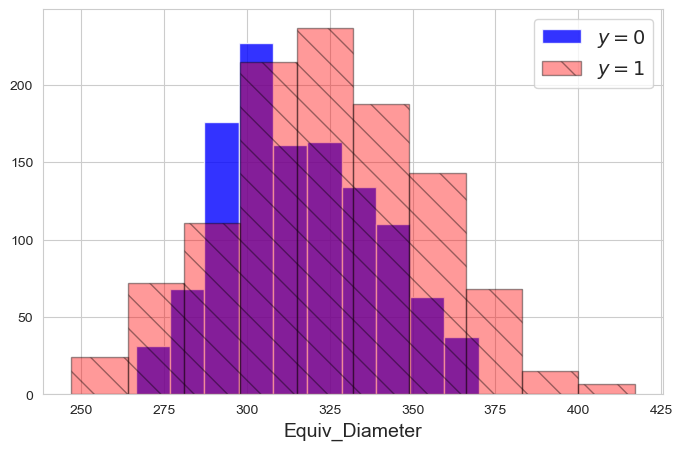

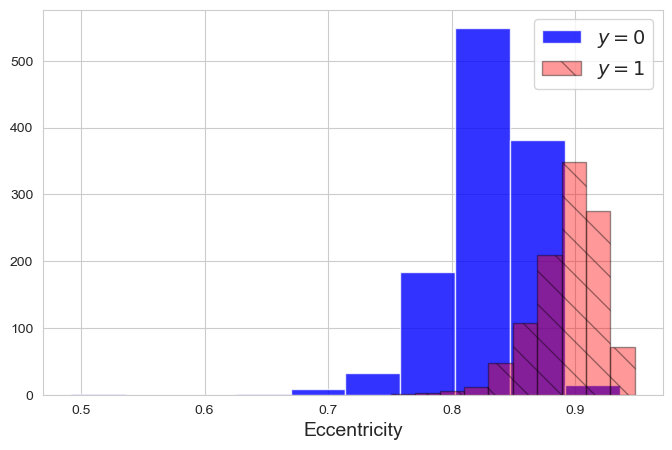

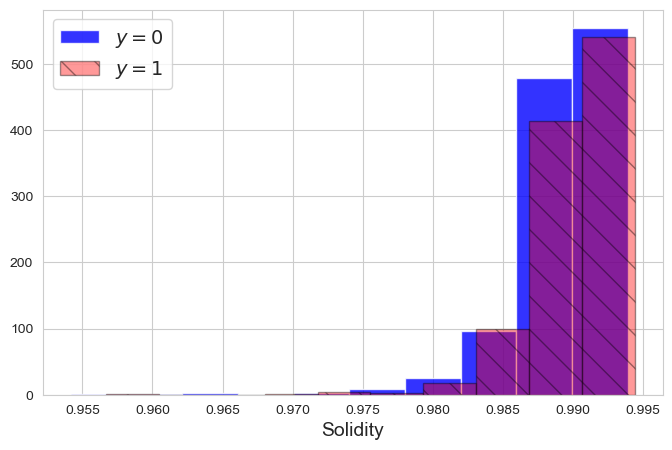

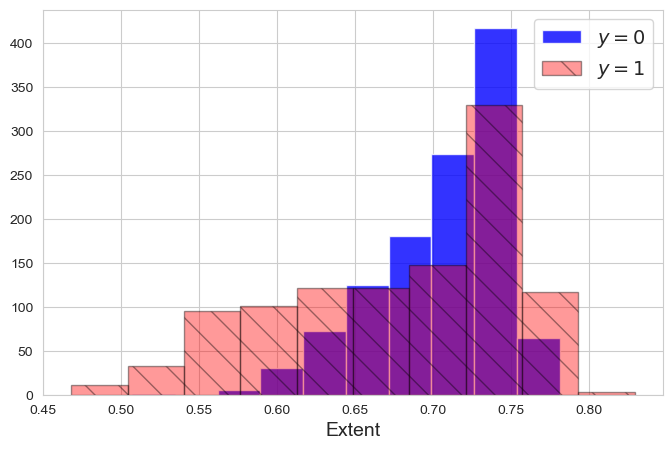

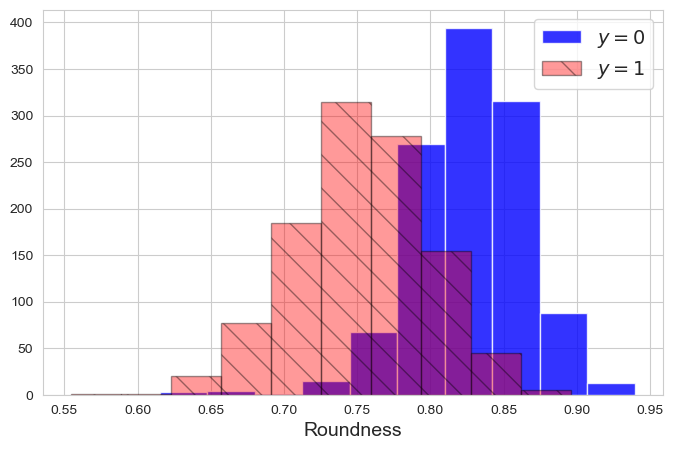

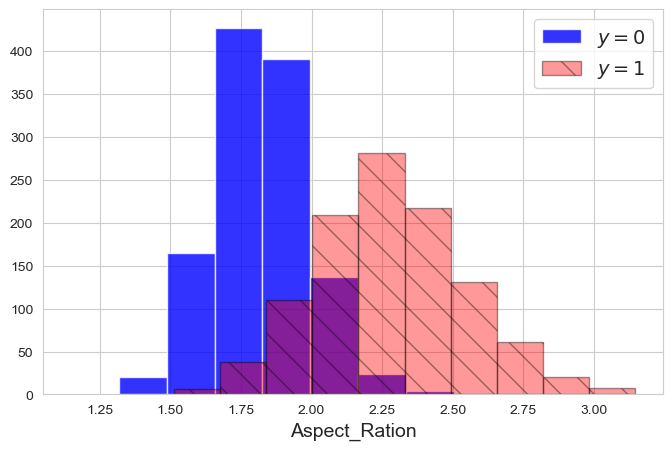

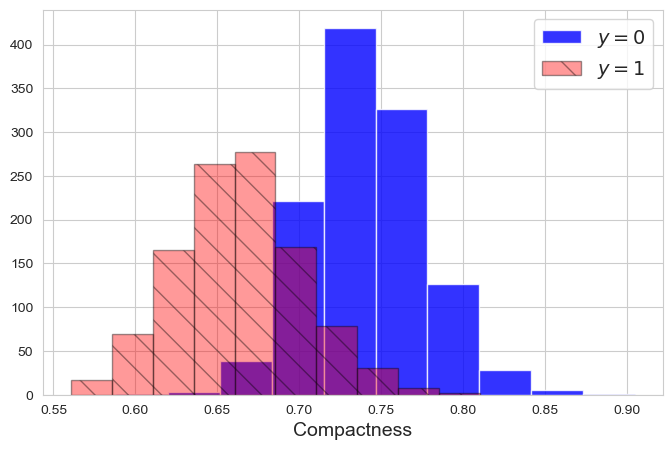

In [13]:
for col in seeds_train.columns[:-2]:
    plt.figure(figsize=(8,5))


    plt.hist(seeds_train.loc[seeds_train.y==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(seeds_train.loc[seeds_train.y==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

These features seem like they may be useful in classifying the seeds.
- `Major_Axis_Length`
- `Eccentricity`
- `Roundness`
- `Aspect_Ration`
- `Compactness`

### b. pairplot

Now try making a `seaborn` `pairplot` using the variables you identified in part <i>a.</i> as the arguments for `x_vars` and `y_vars`. Use `y` as the argument to `hue`. The main goal with this question is to see if you can identify any pairs of variables that seem to separate the two classes.

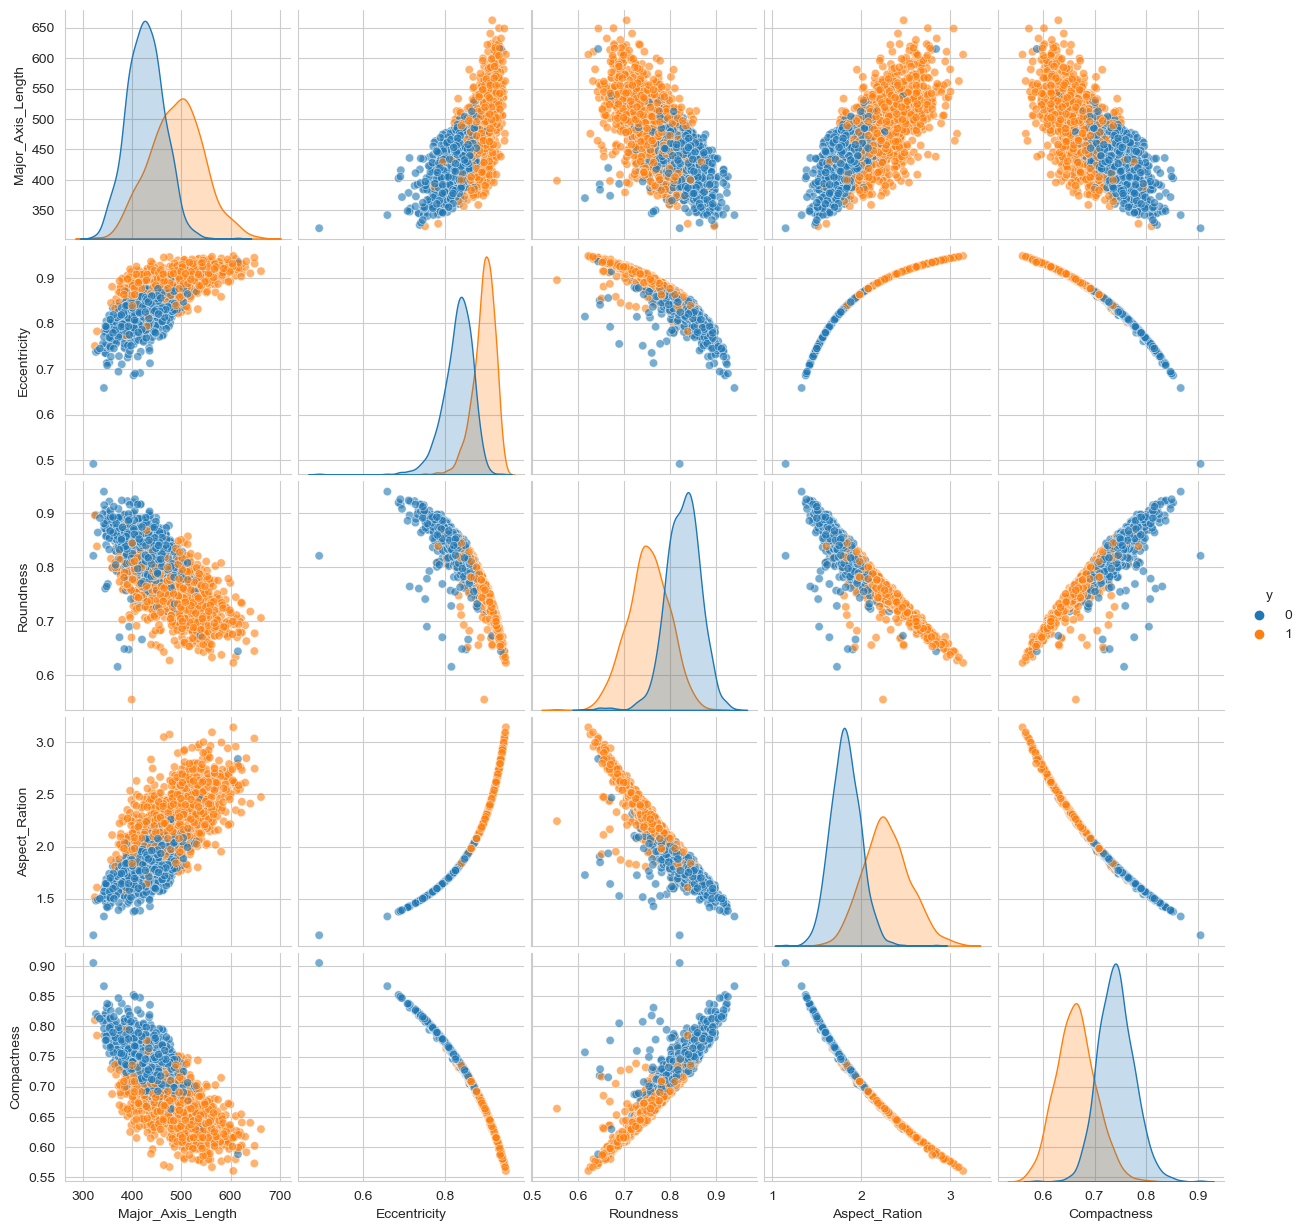

In [14]:
sns.pairplot(data = seeds_train,
                x_vars = ['Major_Axis_Length', 'Eccentricity', 
                              'Roundness', 'Aspect_Ration', 'Compactness'],
                y_vars = ['Major_Axis_Length', 'Eccentricity', 
                              'Roundness', 'Aspect_Ration', 'Compactness'],
                hue = 'y',
                plot_kws = {'alpha':.6})

plt.show()

## 5. Metric selection -- Accuracy
For this problem accuracy is probably a good metric. The classes are well balanced so we will not get an artificially high accuracy and without knowing of any major differences between the two types of pumpkin seeds there is no reason to focus on the proper classification of one of the classes over the other.

In [15]:
from sklearn.metrics import accuracy_score

## 6. Initial modeling attempts

### a. Baseline model
- A random coin flip whose probability for heads is the same as the probability of drawing the more present class,
- Classifying any observation as the majority class.

#### Random coin flip

In [16]:
random_accs = []

for i in range(1000):
    draw = np.random.binomial(n=1,
                                 p=seeds_train.y.sum()/len(seeds_train),
                                 size=len(seeds_train))
    
    random_accs.append(accuracy_score(seeds_train.y.values, draw))
np.mean(random_accs)

0.5006622222222222

Should be about $50\%$.

####  Majority Class

In [18]:
seeds_train.y.value_counts(normalize=True)

0    0.52
1    0.48
Name: y, dtype: float64

About $52\%$.

### b. models comparison

perform 5-fold cross-validation

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [14]:
n_splits = 5

kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=498)

In [15]:
features = ['Major_Axis_Length', 'Eccentricity', 
              'Roundness', 'Aspect_Ration', 'Compactness']

#### 1. logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
full_log_accs = np.zeros(n_splits)

i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    log_reg = LogisticRegression(penalty=None,
                                     max_iter = 1000)
        
    log_reg.fit(seeds_tt[features].values,
                   seeds_tt.y.values)
        
    pred = log_reg.predict(seeds_ho[features].values)
    
    full_log_accs[i] = accuracy_score(seeds_ho.y.values,
                                              pred)
    
    i = i + 1

In [28]:
np.mean(full_log_accs)

0.8715555555555555

#### 2. KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
ks = range(1, 56)
all_features = seeds_train.columns[:-2]

k_all_accs = np.zeros((n_splits, len(ks)))

i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    for k in ks:
        knn = KNeighborsClassifier(k)
        
        knn.fit(seeds_tt[features].values,
                   seeds_tt.y.values)
        
        pred = knn.predict(seeds_ho[features].values)
        
        k_all_accs[i,j] = accuracy_score(seeds_ho.y.values, pred)
        
        j = j + 1
    i = i + 1

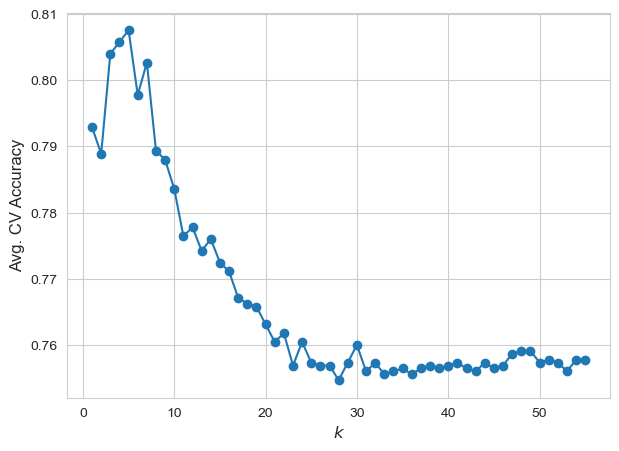

In [33]:
plt.figure(figsize=(7,5))


plt.plot(ks, 
         np.mean(k_all_accs, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()

$k$NN with the hand selected features had about $81\%$ avg. cv. accuracy with $5$ neighbors

#### 3. Principal components analysis (PCA)

One way you may use PCA is as a data preprocessing step for supervised learning tasks. In this problem you will try it as a preprocessing step for the pumpkin seed data and see if this preprocessing step helps your model outperform the models from `Problem Session 8`.

##### a. PCA with two components

Run the training data through PCA with two components and then plot the resulting principal values. Color each point by its class.

<i>Hint: Remember to scale the data before running it through PCA</i>.

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
all_features = seeds_train.columns[:-2]

pca = Pipeline([('scale', StandardScaler()),
                   ('pca', PCA(2))])

fit = pca.fit_transform(seeds_train[all_features])

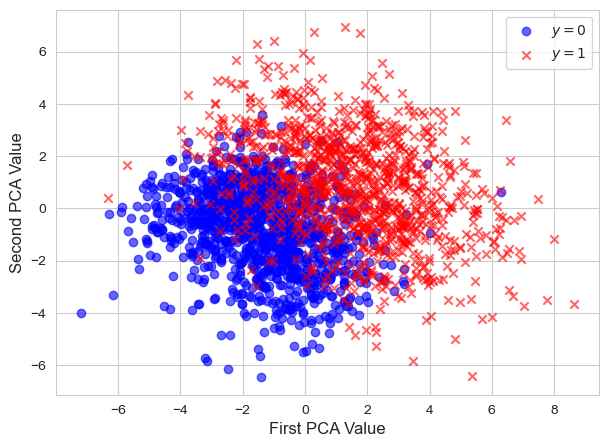

In [37]:
plt.figure(figsize=(7,5))

plt.scatter(fit[seeds_train.y==0, 0], 
            fit[seeds_train.y==0, 1],
            color = 'b',
            label="$y=0$",
            alpha=.6)

plt.scatter(fit[seeds_train.y==1, 0], 
            fit[seeds_train.y==1, 1],
            color='r',
            marker='x',
            label="$y=1$",
            alpha=.6)

plt.legend(fontsize=10)

plt.xlabel("First PCA Value", fontsize=12)
plt.ylabel("Second PCA Value", fontsize=12)

plt.show()

How does the PCA with only two componenets appear to separate the data?

While not perfect separation the two classes do seem to largely live in separate areas of the plot.

##### b. PCA and KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

Run 5-fold cross-validation below to find the optimal value of  𝑘
  for a  𝑘
  nearest neighbors model fit on the first and second PCA values.

In [40]:
n_splits=5
kfold = StratifiedKFold(n_splits,
                           shuffle=True,
                           random_state=2013)

In [45]:
ks = range(1, 51)
comps = range(2,6)

pca_accs = np.zeros((n_splits, len(comps), len(ks)))

i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    print("CV Split", i)
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    for n_comps in comps:
        pca_pipe = Pipeline([('scale', StandardScaler()),
                               ('pca', PCA(n_comps))])
    
    
        pca_tt = pca_pipe.fit_transform(seeds_tt[features].values)
        pca_ho = pca_pipe.transform(seeds_ho[features].values)
        
        k = 0
        for neighbors in ks:
            knn = KNeighborsClassifier(neighbors)
            
            knn.fit(pca_tt,
                    seeds_tt.y.values)

            pred = knn.predict(pca_ho)

            pca_accs[i,j,k] = accuracy_score(seeds_ho.y.values, pred)
            
            k = k + 1
        j = j + 1
    i = i + 1

CV Split 0
CV Split 1
CV Split 2
CV Split 3
CV Split 4


In [46]:
max_index = np.unravel_index(np.argmax(np.mean(pca_accs, axis=0), axis=None), 
                                       np.mean(pca_accs, axis=0).shape)


print("The pair with the highest AVG CV Accuracy was",
         "k =", ks[max_index[1]],
         "and number of components =", np.round(comps[max_index[0]],2))
print("The highest AVG CV Accuracy was", np.max(np.mean(pca_accs, axis=0)))

The pair with the highest AVG CV Accuracy was k = 11 and number of components = 4
The highest AVG CV Accuracy was 0.8875555555555555


#### 4. Trying Bayes based classifiers

Build LDA, QDA and naive Bayes' models on these data


In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [36]:
bayes_accs = np.zeros((n_splits, 3))


i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    ## Linear Discriminant Analysis
    lda = Pipeline([('scale', StandardScaler()),
                    ('lda', LinearDiscriminantAnalysis())])
    
    lda.fit(seeds_tt[features].values,
               seeds_tt.y.values)
    lda_pred = lda.predict(seeds_ho[features].values)
    
    bayes_accs[i, 0] = accuracy_score(seeds_ho.y.values,
                                         lda_pred)
    
    ## Quadratic Discriminant Analysis
    qda = Pipeline([('scale', StandardScaler()),
                    ('qda', QuadraticDiscriminantAnalysis())])
    
    qda.fit(seeds_tt[features].values,
               seeds_tt.y.values)
    
    qda_pred = qda.predict(seeds_ho[features].values)
    
    bayes_accs[i, 1] = accuracy_score(seeds_ho.y.values,
                                         qda_pred)
    
    
    ## Gaussian Naive Bayes
    nb = Pipeline([('scale', StandardScaler()),
                    ('NB', GaussianNB())])
    
    nb.fit(seeds_tt[features].values,
              seeds_tt.y.values)
    
    nb_pred = nb.predict(seeds_ho[features].values)
    
    bayes_accs[i, 2] = accuracy_score(seeds_ho.y.values,
                                         nb_pred)
    
    i = i + 1

In [38]:
np.mean(bayes_accs, axis=0)

array([0.87955556, 0.88266667, 0.87288889])

Comparable to the PCA-$k$nn model.

#### 3.  Support Vector Machine classifier

In [51]:
from sklearn.svm import SVC

##### perform hyperparameter tuning on the C parameter of the support vector classifier
The value of  𝐶
  we choose can be thought of as our "budget" for slack variables. Larger values of  𝐶
  lead to a smaller budget and so we approach the earlier maximum margin classifier, smaller values of  𝐶
  allow for more slack. 

In [52]:
## import kfold
from sklearn.model_selection import StratifiedKFold

## import Pipeline and StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## import accuracy_score
from sklearn.metrics import accuracy_score

In [16]:
features = seeds_train.columns[:-2]

In [54]:
## set the number of CV folds
n_splits = 5

## Make the kfold object
kfold = StratifiedKFold(n_splits, 
                        random_state=2013, 
                        shuffle=True)


## the values of C you will try
Cs = [.01, .1, 1, 10, 25, 50, 75, 100, 125, 150]

## this will hold the CV accuracies
C_accs1 = np.zeros((n_splits, len(Cs)))


## the cross-validation
i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    for C in Cs:
        pipe = Pipeline([('scale', StandardScaler()),
                            ('svm', SVC(C=C))])
    
        pipe.fit(seeds_tt[features],
                    seeds_tt.y)
    
        pred = pipe.predict(seeds_ho[features])

        C_accs1[i, j] = accuracy_score(seeds_ho.y, pred)
        
        j = j + 1
    i = i + 1

Plot the average cross-validation accuracy against the $\log$ of `C`.

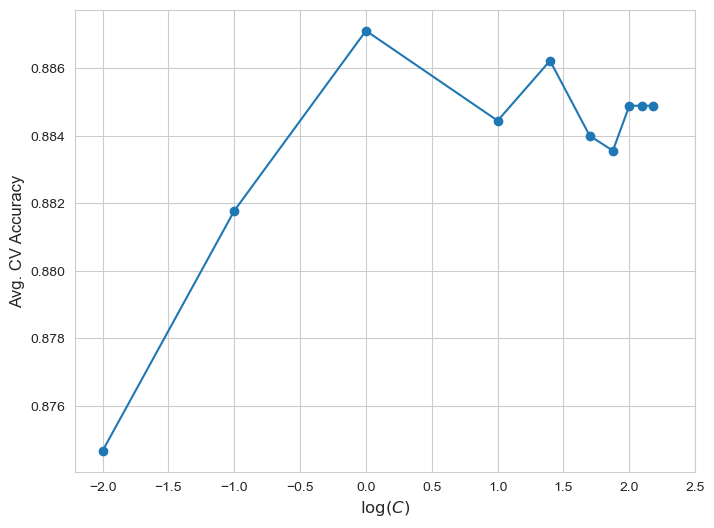

In [55]:
plt.figure(figsize = (8,6))

plt.plot(np.log10(np.array(Cs)), 
         np.mean(C_accs1, axis=0), 
         '-o')

plt.xlabel("$\log(C)$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)
plt.xticks(np.arange(-2,3,.5),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [56]:
## the values of C you will try
Cs = np.arange(10,51,1)

## this will hold the CV accuracies
C_accs2 = np.zeros((n_splits, len(Cs)))


## the cross-validation
i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    for C in Cs:
        pipe = Pipeline([('scale', StandardScaler()),
                            ('svm', SVC(C=C))])
    
        pipe.fit(seeds_tt[features],
                    seeds_tt.y)
    
        pred = pipe.predict(seeds_ho[features])

        C_accs2[i, j] = accuracy_score(seeds_ho.y, pred)
        
        j = j + 1
    i = i + 1

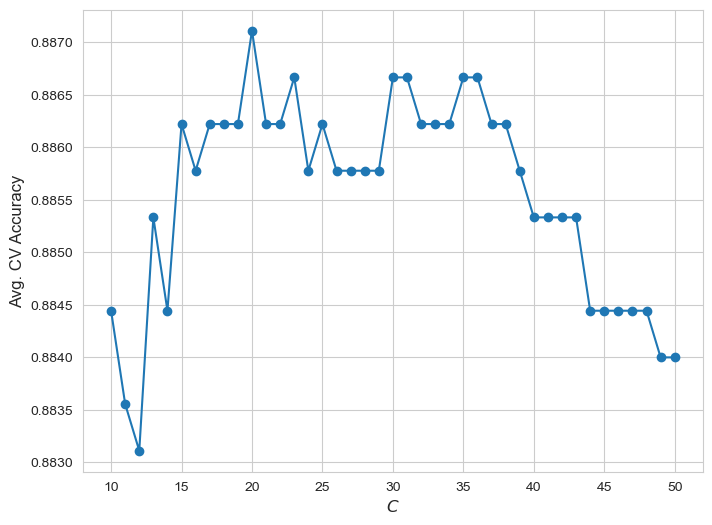

In [57]:
plt.figure(figsize = (8,6))

plt.plot(Cs, 
         np.mean(C_accs2, axis=0), 
         '-o')

plt.xlabel("$C$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

the optimal value of `C=20`, the average cross-validation accuracy for this value of `C` is about 0.89

#### 6. Tuning a random forest with `GridSearchCV`

We will tune the `max_depth` and `n_estimators` hyperparameters of a random forest model. First you will use a `for` loop for the cross-validation. Then you will see how much easier your life could be with `GridSearchCV`.

In [41]:
from sklearn.ensemble import RandomForestClassifier

##### a. cross-validation

find the values of max_depth and n_estimators with the highest average cross-validation accuracy

In [60]:
max_depths = range(1, 11)
n_trees = [100, 500]

rf_accs = np.zeros((n_splits, len(max_depths), len(n_trees)))


i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    for max_depth in max_depths:
        k = 0
        for n_estimators in n_trees:
            rf = RandomForestClassifier(n_estimators = n_estimators,
                                           max_depth = max_depth,
                                           max_samples = int(.8*len(seeds_tt)),
                                           random_state = 403)
            
            rf.fit(seeds_tt[features], seeds_tt.y)
            
            pred = rf.predict(seeds_ho[features])
            
            rf_accs[i,j,k] = accuracy_score(seeds_ho.y,  pred)
            k = k + 1
        j = j + 1
    i = i + 1

In [61]:
max_index = np.unravel_index(np.argmax(np.mean(rf_accs, axis=0), axis=None), 
                                       np.mean(rf_accs, axis=0).shape)


print(max_depths[max_index[0]],n_trees[max_index[1]])

9 500


In [62]:
np.mean(rf_accs, axis=0)[max_index]

0.8933333333333333

##### b. GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

In [65]:
grid_cv = GridSearchCV(RandomForestClassifier(), # first put the model object here
                          param_grid = {'max_depth':max_depths, # place the grid values for max_depth and
                                        'n_estimators':n_trees}, # and n_estimators here
                          scoring = 'accuracy', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = 5) # put the number of cv splits here

## you fit it just like a model
grid_cv.fit(seeds_train[features], seeds_train.y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11), 'n_estimators': [100, 500]},
             scoring='accuracy')

Once a `GridSearchCV` is fit you are easily able to find what hyperparameter combinations were best, what the optimal score was as well as get access to the best model.

In [66]:
## You can find the hyperparameter grid point that
## gave the best performance like so
## .best_params_
grid_cv.best_params_

{'max_depth': 9, 'n_estimators': 500}

In [67]:
grid_cv.best_score_

0.8937777777777777

In [68]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=500)

In [69]:
## We can get all of the results with cv_results_
grid_cv.cv_results_

{'mean_fit_time': array([0.24058571, 1.14802289, 0.27619958, 1.40919785, 0.37159801,
        1.93799539, 0.4142159 , 2.29097986, 0.5164114 , 2.66855063,
        0.54021316, 2.72129765, 0.60403152, 2.76170197, 0.60483208,
        3.38436127, 0.678686  , 3.0880506 , 0.63502927, 3.24624214]),
 'std_fit_time': array([0.02355218, 0.07102333, 0.01845407, 0.01795846, 0.03843139,
        0.14551071, 0.0222653 , 0.09437901, 0.01701073, 0.26454574,
        0.03794891, 0.07384315, 0.04627009, 0.0334088 , 0.03495912,
        0.33069592, 0.08315162, 0.05360871, 0.02499073, 0.11853214]),
 'mean_score_time': array([0.01321397, 0.05857768, 0.01299901, 0.05720263, 0.01579394,
        0.06501317, 0.01499271, 0.07059431, 0.01701732, 0.07842884,
        0.01661544, 0.07061462, 0.01761026, 0.0728004 , 0.01679635,
        0.08520975, 0.01878614, 0.07280664, 0.01700063, 0.22739682]),
 'std_score_time': array([4.09913961e-04, 2.94631739e-03, 3.16297988e-07, 3.98855155e-04,
        3.66003043e-03, 5.73021141e-

In [70]:
pd.DataFrame({'feature_importance_score':grid_cv.best_estimator_.feature_importances_},
                 index=features).sort_values('feature_importance_score',
                                                ascending=False)

,feature_importance_score
Aspect_Ration,0.211056
Compactness,0.200572
Eccentricity,0.196153
Roundness,0.102974
Major_Axis_Length,0.068967
Minor_Axis_Length,0.046242
Solidity,0.044116
Perimeter,0.036206
Extent,0.027336
Area,0.022536


comparing with  EDA notes (no particular order)
:
- Major_Axis_Length
- Eccentricity
- Roundness
- Aspect_Ration
- Compactness

These happen to be the features with the highest feature importance scores from the random forest model.

#### 7. Gradient boosting

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gb_cv = GridSearchCV(GradientBoostingClassifier(random_state=234), # first put the model object here
                          param_grid = {'max_depth': [3,5,7], # place the grid values for max_depth and
                                        'n_estimators': [100,200,300,400,500],
                                        'learning_rate':[0.01,0.05,0.1,0.2]}, # and n_estimators here
                          scoring = 'accuracy', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = n_splits ) # put the number of cv splits here

In [21]:
gb_cv.fit(seeds_train[features], seeds_train.y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=234),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [22]:
gb_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}

In [23]:
gb_cv.best_score_

0.8893333333333333

#### 8. XGBoost

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb_cv = GridSearchCV(XGBClassifier(random_state=432), # first put the model object here
                          param_grid = {'max_depth': [3,5,7], # place the grid values for max_depth and
                                        'n_estimators': [100,200,300,400,500],
                                        'learning_rate':[0.01,0.05,0.1,0.2]}, # and n_estimators here
                          scoring = 'accuracy', # put the metric we are trying to optimize here as a string, "accuracy"
                          cv = n_splits ) # put the number of cv splits here

In [28]:
xgb_cv.fit(seeds_train[features], seeds_train.y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=432, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [29]:
gb_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}

In [31]:
xgb_cv.best_score_

0.8879999999999999

### Model selection

In [49]:
pd.DataFrame({'Model': ['Baseline(random coin flip)', 'Baseline(Majority Class)', 'Logistic Regression',
                        'KNN(k=5)', 'PCA+KNN', 'LDA', 'QCA', "GuassianNB", 'SVC(C=20)',  'Random Forest', 
                        'Gradient Boosting', 'XGBoost'],
                   'accuracy': [0.502, 0.520, 0.871, 0.810, 0.887, 0.879, 0.883, 0.873,
                                0.890, 0.894, 0.889, 0.888]}).sort_values('accuracy')

,Model,accuracy
0,Baseline(random coin flip),0.502
1,Baseline(Majority Class),0.520
3,KNN(k=5),0.810
2,Logistic Regression,0.871
7,GuassianNB,0.873
5,LDA,0.879
6,QCA,0.883
4,PCA+KNN,0.887
11,XGBoost,0.888
10,Gradient Boosting,0.889


## 7 Examining the test performance

Based on the above, the bestperforming model is Random Forest with {'max_depth': 9, 'n_estimators': 500}

### a. fit the model on the entire train set.

In [42]:
model = RandomForestClassifier(max_depth=9,
                               n_estimators=500,
                               random_state=234)

In [43]:
model.fit(seeds_train[features], seeds_train.y)

RandomForestClassifier(max_depth=9, n_estimators=500, random_state=234)

In [47]:
print("Training Accuracy:", accuracy_score(model.predict(seeds_train[features]), seeds_train.y))

Training Accuracy: 0.9551111111111111


In [48]:
print("Training Accuracy:", accuracy_score(model.predict(seeds_test[features]), seeds_test.y))

Training Accuracy: 0.868
